In [1]:
#Utility
import numpy as np
import pandas as pd

import glob
import time
import os
from math import sqrt
import warnings

#kera for tensorflow support
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

#Data Visuallization
import matplotlib.pyplot as plt

## Datasource folders

In [2]:
YAHOO_DS="/root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0"
DIRS = ['A1Benchmark', 'A2Benchmark','A3Benchmark', 'A4Benchmark']
DATA_FILE_EXTENSION = "*.csv"
warnings.filterwarnings('ignore')

In [3]:
Benchmark_dir  = YAHOO_DS + os.path.sep + DIRS[1] + os.path.sep 
Benchmark_dir

'/root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/'

## Reading Data

In [4]:
#A1 = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/**/*.csv', recursive=True)
A1 = glob.glob(Benchmark_dir + DATA_FILE_EXTENSION, recursive=True)
#A1

In [5]:
start_millis = int(round(time.time() * 1000))
num_files = 0
df_indexed_all = pd.DataFrame()
df_plotting = []
for data_file in A1:
    df = pd.read_csv(data_file)
    df_plotting.append(df)
    df_indexed_all = df_indexed_all.append(df)
    #print("Shape of new dataframes - {}, {} , {}".format(df_indexed_all.shape, len(df_plotting), df.shape)) 
    num_files = num_files + 1;
end_millis = int(round(time.time() * 1000))
print (f'Loaded {num_files} data files from the location {Benchmark_dir} in {end_millis - start_millis} ms')

Loaded 100 data files from the location /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/ in 418 ms


## Exploring Data

#### The following is a generalized method for visualizing the data, to understand the nature of the data.  

In [6]:
def graph_raw_data(df_to_plot):
    #plt.plot(df['timestamp'], df['value'])
    plt.figure(figsize=(40,10))
    plt.set_ylabel = "Date"
    #plt.ylabel="Server Traffic"
    plt.plot(df_to_plot['timestamp'], df_to_plot['value'], Label='value')
    #plt.plot(df['timestamp'], (df['is_anomaly'] * df['value'] > 0)  , Label='is_anomaly', c='r', marker=r'$\clubsuit$', alpha=0.5)
    plt.scatter(df_to_plot['timestamp'], (df_to_plot['is_anomaly'] * df_to_plot['value']), c='r', alpha=0.5)
    plt.gcf().autofmt_xdate()
    plt.legend(("value", "is_anomaly"))
    plt.ylim(25)
    plt.show()

#### Plotting a few randomly chosen files to see the data type and show the anomalous records in the dataset.  

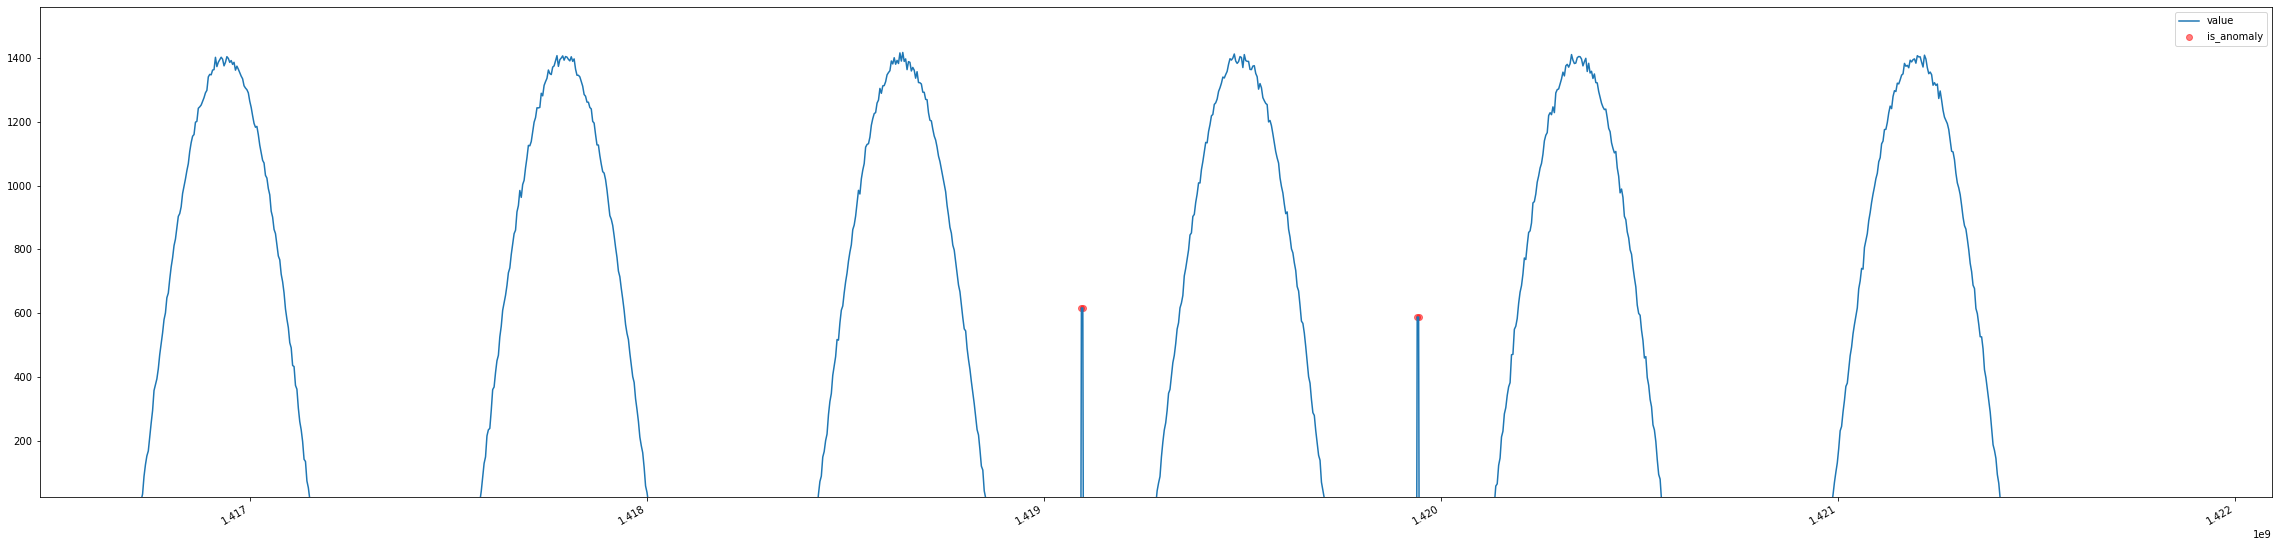

In [7]:
graph_raw_data(df_plotting[0])

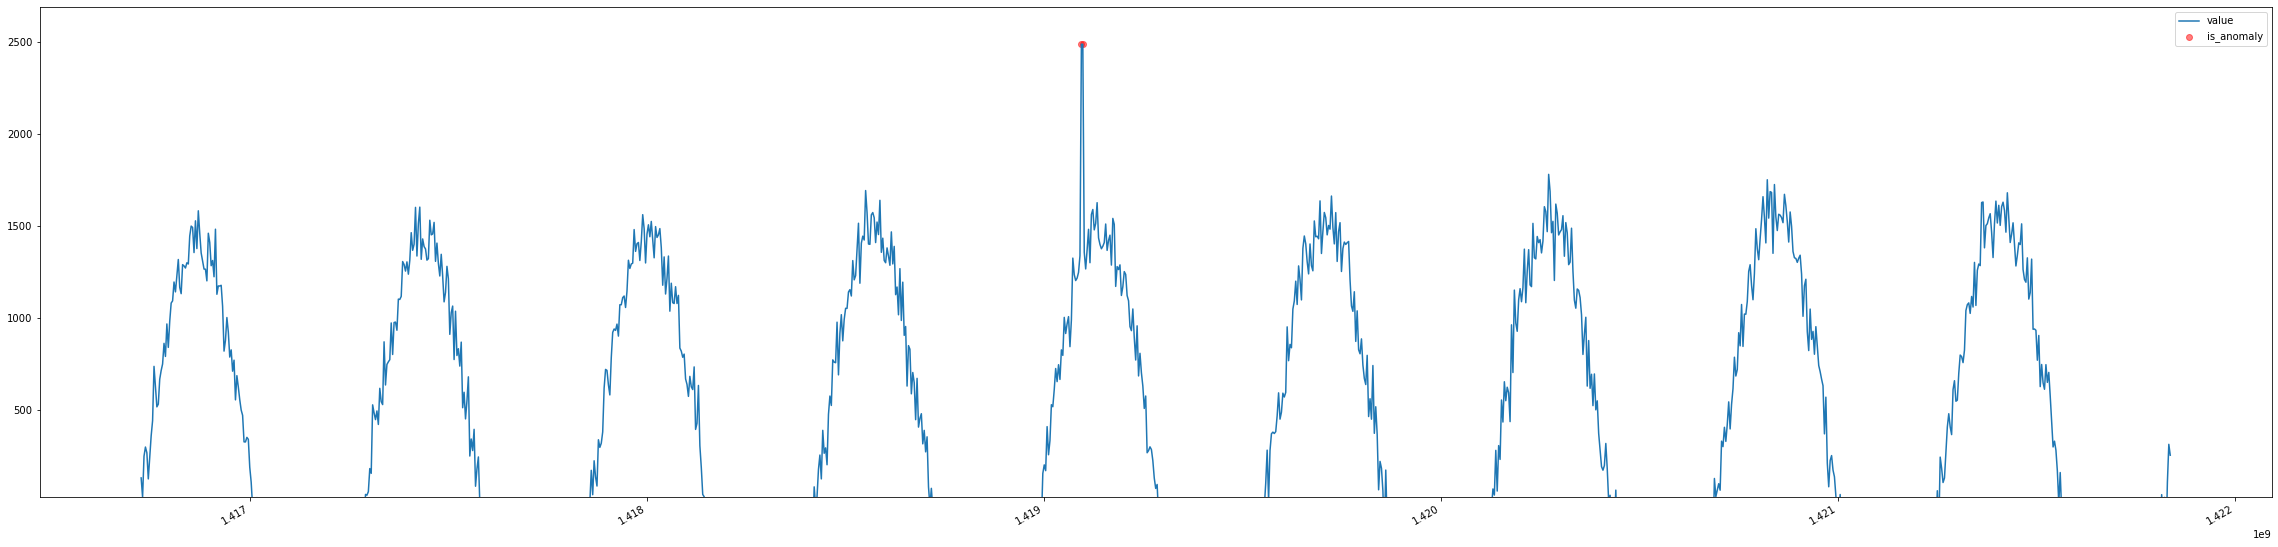

In [8]:
graph_raw_data(df_plotting[1])

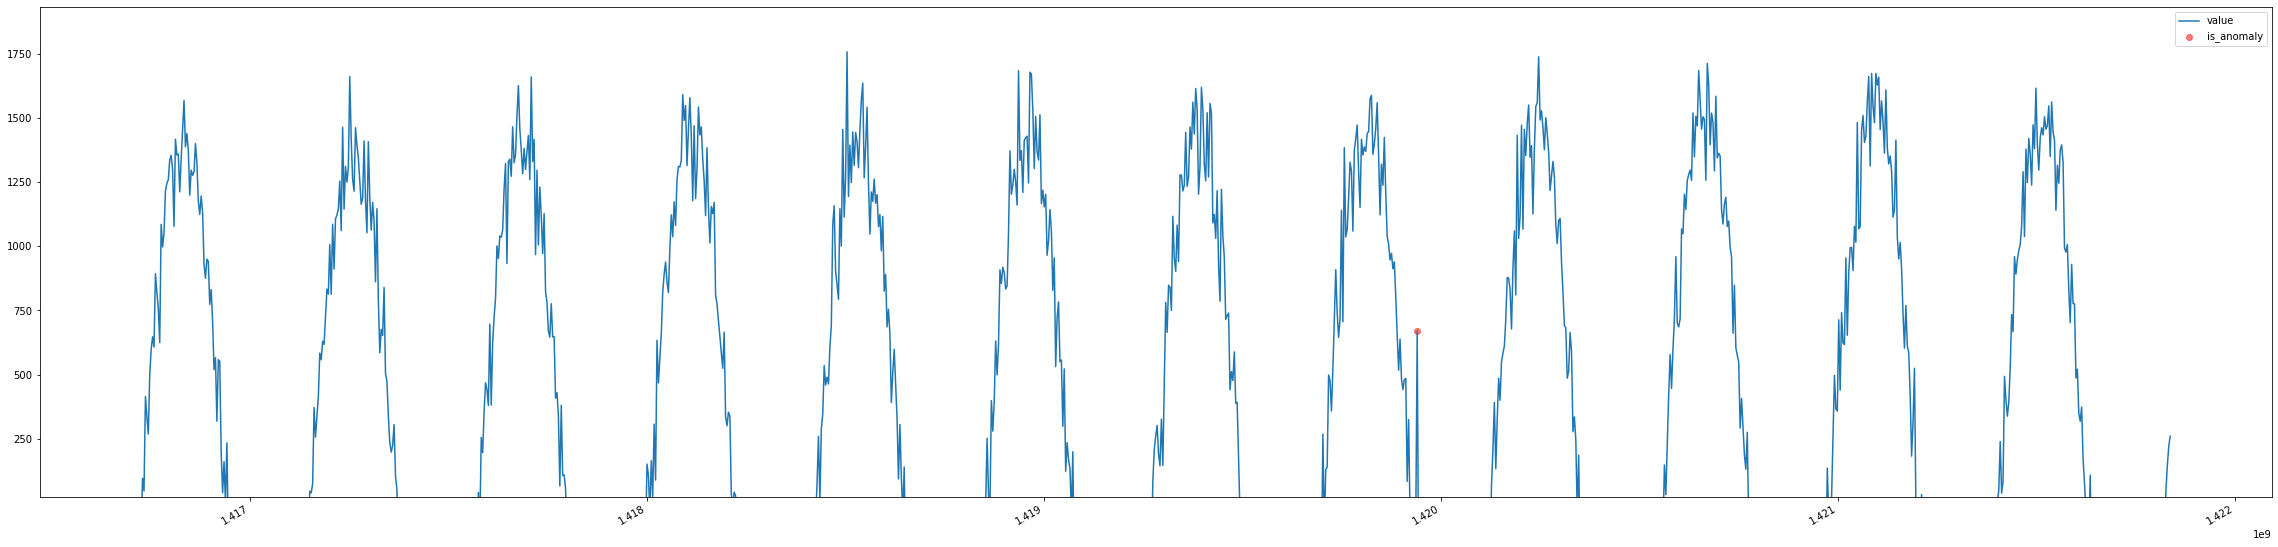

In [9]:
graph_raw_data(df_plotting[4])

#### Standardizing values

In [10]:
values = df_indexed_all.copy()
values = values.drop(columns=['is_anomaly'],axis=1)
values = values.drop(columns=['timestamp'],axis=1)
scaler2 = StandardScaler()
scaler2 = scaler2.fit(values)
standardaized = scaler2.transform(values)
df_indexed_all['std_value'] = standardaized

In [11]:
standardaized

array([[-0.65628838],
       [-0.65411244],
       [-0.64799332],
       ...,
       [-0.1908856 ],
       [-0.18691955],
       [-0.19563185]])

#### Shuffling the data

In [12]:
df_indexed_all =df_indexed_all.sample(frac=1)

#### Splitting the data into training and test 80 : 20

In [13]:
num_records = len(df_indexed_all)
train_record_idx = round (num_records * 0.8)
test_record_idx = train_record_idx + 1 
print ('Total Number of records :', num_records , '\nTraining records        :', train_record_idx, '\nTest records            :', (num_records - test_record_idx + 1))

Total Number of records : 142100 
Training records        : 113680 
Test records            : 28420


#### Splitting the data into training and test 80 : 20

In [14]:
train_data = df_indexed_all.iloc[:train_record_idx, :]
test_data =  df_indexed_all.iloc[test_record_idx:,:]

In [15]:
print("Shape of new dataframes - {}, {} , {}".format(df_indexed_all.shape, train_data.shape, test_data.shape)) 

Shape of new dataframes - (142100, 4), (113680, 4) , (28419, 4)


In [16]:
train_data

,timestamp,value,is_anomaly,std_value
1236,1421175600,20089.242275,0,1.562887
1364,1421636400,5930.182032,0,-0.002288
1104,1420700400,2075.379222,0,-0.428407
932,1420081200,5783.247576,0,-0.018531
278,1417726800,434.655316,0,-0.609776
...,...,...,...,...
362,1418029200,4124.414654,0,-0.201902
512,1418569200,3494.492456,0,-0.271535
849,1419782400,15047.617706,0,1.005574
611,1418925600,2.534498,0,-0.657544


In [17]:
X_train = train_data[["timestamp","std_value"]].values
Y_train = train_data[["is_anomaly"]].values

X_test = test_data[["timestamp","std_value"]].values
Y_test = test_data[["is_anomaly"]].values

In [18]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((113680, 2), (113680, 1), (28419, 2), (28419, 1))

In [19]:
# Create the model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
#model.add(Dense(100, input_dim=1, activation='relu'))
#model.add(Dense(50, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, epochs=5, batch_size=10)

Epoch 1/5
11368/11368 [==============================] - 40s 3ms/step - loss: 433976.4375 - accuracy: 0.9899
Epoch 2/5
11368/11368 [==============================] - 49s 4ms/step - loss: 88229.5547 - accuracy: 0.9933
Epoch 3/5
11368/11368 [==============================] - 48s 4ms/step - loss: 82771.3359 - accuracy: 0.9934
Epoch 4/5
11368/11368 [==============================] - 54s 5ms/step - loss: 80901.1641 - accuracy: 0.9933
Epoch 5/5
11368/11368 [==============================] - 43s 4ms/step - loss: 77848.9766 - accuracy: 0.9935


#### Model Summary

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                36        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


#### Model Accuracy

In [23]:
# evaluate the keras model
score, accuracy = model.evaluate(X_test, Y_test)
print('Score    : %.2f' % (score*100))
print('Accuracy : %.2f' % (accuracy*100))

889/889 [==============================] - 3s 3ms/step - loss: 28197.3105 - accuracy: 0.9965
Score    : 2819731.05
Accuracy : 99.65


In [24]:
model.get_weights()

[array([[-4.3145529e-04, -2.1794719e-01,  2.0905088e-01, -1.3553894e-01,
          3.8725543e-01, -5.9635919e-01, -1.4257151e-01, -8.1468165e-02,
          3.3229780e-01, -4.5860472e-01, -1.6687104e-01, -3.4291518e-01],
        [-1.3210499e+00,  6.1637461e-01,  4.8541374e+00,  2.9691696e-01,
         -4.7124662e+00,  4.6212792e-02, -1.9668046e-01, -2.7520072e-01,
          4.7309341e+00,  4.7574747e-01,  4.6692789e-01,  1.8148500e-01]],
       dtype=float32),
 array([-0.41061953,  0.        , -0.1099232 ,  0.        , -0.00256526,
         0.        ,  0.        ,  0.        , -0.06957487,  0.        ,
         0.        ,  0.        ], dtype=float32),
 array([[-2.5866809e-04],
        [-3.7440977e-01],
        [ 2.2957200e-01],
        [ 8.7435722e-02],
        [-5.8184165e-01],
        [-4.9795359e-01],
        [-3.1593812e-01],
        [-4.8501468e-01],
        [ 5.1665521e-01],
        [-5.8102351e-01],
        [-4.7978133e-01],
        [ 1.7558223e-01]], dtype=float32),
 array([-0